In [ ]:
pip install mamba

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.9/234.9 kB 9.0 MB/s eta 0:00:00
  Created wheel for mamba: filename=mamba-0.11.3-py3-none-any.whl size=16290 sha256=12ffdf15b3cbe7249748b12642507c56fee29a7e37ec6bf91255687279b72684
  Stored in directory: /root/.cache/pip/wheels/b1/67/9b/1bf493e22d874961e3ffee60e2576feb601272acb3181cdc29
  Created wheel for clint: filename=clint-0.5.1-py3-none-any.whl size=34459 sha256=13a59fd1986345684c7eceefbf782405c80b203e5dba1880611b2e02cfe33323
  Stored in directory: /root/.cache/pip/wheels/60/bd/a0/c20dd085251d95af656b5e3d287db7d4b4e8aec67b53a6f8dd
  Created wheel for args: filename=args-0.1.0-py3-none-any.whl size=3319 sha256=8cdbeba2e7f952f4185930aa94f44a943b9d4a73ce4b57eb703df97b078351ec
  Stored in directory: /root/.cache/pip/wheels/18/d7/bc/7b88d8405d97070a1a62712fd639ea0ad8d14b3dd74075cca6
Successfully built mamba clint arg

In [ ]:
# Step 1: Generate the C code
def generate_c_code():
    code = """
#include <stdio.h>
#include <string.h>

// Função para determinar se o acorde é maior ou menor
const char* determine_chord(const char* note1, const char* note2, const char* note3) {
    // Lista de notas musicais
    const char* notes[] = {"C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"};

    // Função para encontrar o índice de uma nota
    int find_note_index(const char* note) {
        for (int i = 0; i < 12; i++) {
            if (strcmp(notes[i], note) == 0) {
                return i;
            }
        }
        return -1; // Nota não encontrada
    }

    // Encontrar índices das notas
    int index1 = find_note_index(note1);
    int index2 = find_note_index(note2);
    int index3 = find_note_index(note3);

    // Verificar se as notas são válidas
    if (index1 == -1 || index2 == -1 || index3 == -1) {
        return "Notas inválidas";
    }

    // Calcular intervalos entre as notas
    int interval1 = (index2 - index1 + 12) % 12;
    int interval2 = (index3 - index2 + 12) % 12;

    // Determinar se o acorde é maior ou menor
    if ((interval1 == 4 && interval2 == 3) || (interval1 == 3 && interval2 == 4)) {
        return "Acorde Maior";
    } else if ((interval1 == 3 && interval2 == 4) || (interval1 == 4 && interval2 == 3)) {
        return "Acorde Menor";
    } else {
        return "Acorde Desconhecido";
    }
}

int main() {
    char note1[3], note2[3], note3[3];

    // Solicitar input do usuário
    printf("Digite a primeira nota: ");
    scanf("%2s", note1);
    printf("Digite a segunda nota: ");
    scanf("%2s", note2);
    printf("Digite a terceira nota: ");
    scanf("%2s", note3);

    const char* result = determine_chord(note1, note2, note3);
    printf("O acorde formado pelas notas %s, %s e %s é: %s\\n", note1, note2, note3, result);

    return 0;
}
"""
    return code

# Gerar o código em C
c_code = generate_c_code()

# Step 2: Save the C code to a file
with open("chord_detector.c", "w") as file:
    file.write(c_code)

# Step 3: Compile the C code using gcc
!gcc -o chord_detector chord_detector.c

# Step 4: Run the compiled C code
!./chord_detector


Digite a primeira nota: C
Digite a segunda nota: D#
Digite a terceira nota: G
O acorde formado pelas notas C, D# e G é: Acorde Maior


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,635 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

Saving recibo1.png to recibo1 (1).png


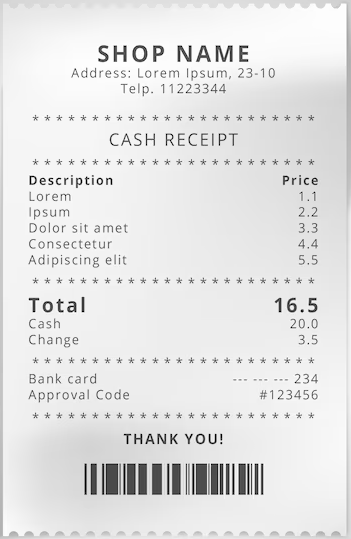

Extracted text from recibo1 (1).png:
SHOP NAME

Address: Lorem Ipsum, 23-10
Telp. 11223344

CASH RECEIPT

Description Price
Lorem 11
Ipsum 2.2
Dolor sit amet 3.3
Consectetur 44
Adipiscing elit 5.5

Total 16.5

Cash 20.0

Change 3.5

Bank card 234

Approval Code #123456
THANK YOU!

 

IMI



In [ ]:
# Step 1: Install the necessary libraries
!pip install pytesseract Pillow
!apt-get install tesseract-ocr

# Step 2: Import the necessary libraries
import pytesseract
from PIL import Image
from IPython.display import display, Image as IPImage
import ipywidgets as widgets
from google.colab import files

# Step 3: Upload an image
uploaded = files.upload()

# Step 4: Display the uploaded image
for filename in uploaded.keys():
    display(IPImage(filename=filename))

# Step 5: Perform OCR on the image
def perform_ocr(image_path):
    # Open the image file
    image = Image.open(image_path)

    # Use pytesseract to do OCR on the image
    text = pytesseract.image_to_string(image)
    return text

# Step 6: Display the extracted text
for filename in uploaded.keys():
    extracted_text = perform_ocr(filename)
    print(f"Extracted text from {filename}:\n{extracted_text}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Step 1: Install the necessary libraries
!pip install requests

# Step 2: Import the necessary libraries
import json
import os
import requests

# Retrieve the API key from environment variables or directly
api_key = "nbiOIg73VVGoJwPvixtR1ElLac0HNk1F"

# Define the URL and headers
url = "https://api.mistral.ai/v1/chat/completions"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

# Define the payload
payload = {
    "model": "pixtral-12b-2409",
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What’s in this image?"
                },
                {
                    "type": "image_url",
                    "image_url": "https://intellspot.com/wp-content/uploads/2017/12/bar-chart-example.png"
                }
            ]
        }
    ],
    "max_tokens": 300
}

# Make the request
response = requests.post(url, headers=headers, data=json.dumps(payload))

# Check the response
if response.status_code == 200:
    print("Request successful!")
    print(response.json())
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)


Request successful!
{'id': '04fc80df41754a9bb04b2939403a5837', 'object': 'chat.completion', 'created': 1732799853, 'model': 'pixtral-12b-2409', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'The image is a bar chart titled "Sales of Product A and Product B." It displays sales data from 2015 to 2017 in USD. The sales data for Product A is represented by green bars, while the sales data for Product B is represented by orange bars.\n\nHere is a detailed breakdown of the sales data for each year:\n\n- **2015:**\n  - Product A: $60,000\n  - Product B: $40,000\n\n- **2016:**\n  - Product A: $80,000\n  - Product B: $50,000\n\n- **2017:**\n  - Product A: $90,000\n  - Product B: $60,000\n\nObservations:\n1. Product A\'s sales have increased each year from 2015 to 2017.\n2. Product B\'s sales have also increased each year from 2015 to 2017.\n3. In 2015, Product A had higher sales compared to Product B.\n4. This trend continued in 2016 and 2017, with Product A consistently 

In [ ]:
# Step 1: Install the necessary libraries
!pip install requests

# Step 2: Import the necessary libraries
import json
import requests

# Retrieve the API key from environment variables or directly
api_key = "nbiOIg73VVGoJwPvixtR1ElLac0HNk1F"

# Define the URL and headers
url = "https://api.mistral.ai/v1/chat/completions"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

# Define the payload
payload = {
    "model": "pixtral-12b-2409",
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": (
                        "Escreva um texto sobre piano clássico, focando em compositores como Beethoven, Chopin e Mozart. "
                        "Inclua informações sobre suas composições mais famosas e o impacto que tiveram na música clássica."
                    )
                }
            ]
        }
    ],
    "max_tokens": 500
}

# Make the request
response = requests.post(url, headers=headers, data=json.dumps(payload))

# Check the response
if response.status_code == 200:
    print("Request successful!")
    print(response.json())
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)


Request successful!
{'id': 'df7e2fee36b44b47847229b4fcc53eb4', 'object': 'chat.completion', 'created': 1732799993, 'model': 'pixtral-12b-2409', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'O piano clássico é um dos instrumentos mais icônicos da música clássica, e muitos compositores ao longo dos séculos têm deixado uma marca indelével na história da música através de suas obras para piano. Entre esses gênios, Beethoven, Chopin e Mozart se destacam por suas composições inovadoras e profundas, que ainda hoje são amplamente admiradas e interpretadas.\n\nLudwig van Beethoven, nascido em 1770, é frequentemente considerado um dos maiores compositores de todos os tempos. Sua vida e obra são marcadas por uma transformação radical da música clássica. Beethoven começou sua carreira como um prodígio do piano, mas suas composições mais influentes se destacam por sua profundidade emocional e inovação estrutural. A "Sonata para Piano n.º 14 em dó sustenido menor" ("Claro de 